In [1]:
import pandas as pd
import numpy as np
from pygments.styles.dracula import background
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('dataset_for_dano_fuel.csv')
df['week'] = pd.to_datetime(df['week'])

In [3]:
BG_COLOR = '#1f1f1f'
TEXT_COLOR = 'white'
ACCENT_COLOR = '#fedd2c'
GRID_COLOR = '#444444'
DARK_ACCENT = '#3d3d3d'
SECONDARY_COLOR = '#a6a6a6'
DARK_BASE = '#2b2b2b'
OTHER_COLOR = '#e0e0e0'
NEGATIVE_COLOR = '#555555'

plt.rcParams.update({
    'figure.facecolor': BG_COLOR,
    'axes.facecolor': BG_COLOR,
    'text.color': TEXT_COLOR,
    'axes.labelcolor': TEXT_COLOR,
    'xtick.color': TEXT_COLOR,
    'ytick.color': TEXT_COLOR,
    'axes.edgecolor': TEXT_COLOR,
    'grid.color': GRID_COLOR,
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'font.size': 14
})

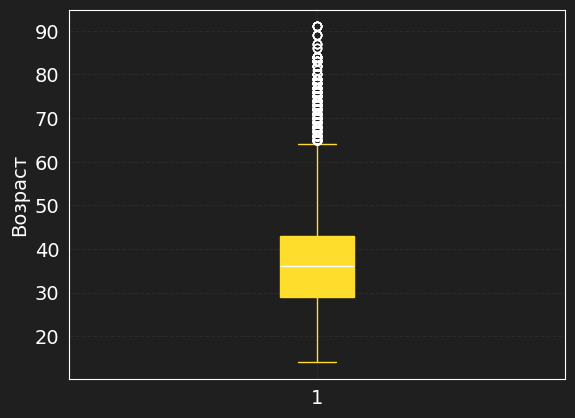

In [4]:
fig, ax = plt.subplots(facecolor=BG_COLOR)
ax.set_facecolor(BG_COLOR)

bp = ax.boxplot(data=df[~df['age'].isna()], x='age', patch_artist=True)

for box in bp['boxes']:
    box.set_facecolor(ACCENT_COLOR)
    box.set_edgecolor(ACCENT_COLOR)

for whisker in bp['whiskers']:
    whisker.set_color(ACCENT_COLOR)

for cap in bp['caps']:
    cap.set_color(ACCENT_COLOR)

for median in bp['medians']:
    median.set_color('white')

for flier in bp['fliers']:
    flier.set_markeredgecolor('white')

ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.ylabel('Возраст')
plt.show()

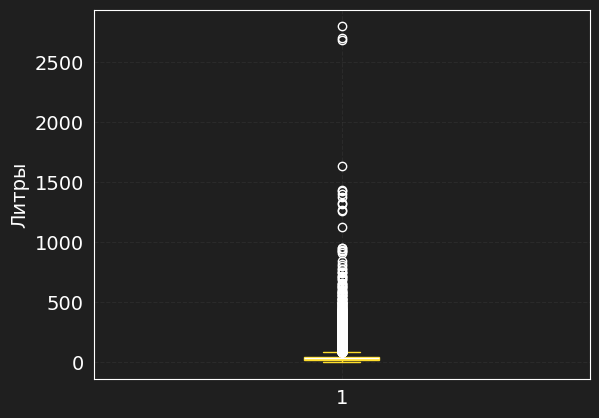

In [5]:
fig, ax = plt.subplots(facecolor=BG_COLOR)
ax.set_facecolor(BG_COLOR)

bp = ax.boxplot(data=df[~df['liters'].isna()], x='liters', patch_artist=True)

for box in bp['boxes']:
    box.set_facecolor(ACCENT_COLOR)
    box.set_edgecolor(ACCENT_COLOR)

for whisker in bp['whiskers']:
    whisker.set_color(ACCENT_COLOR)

for cap in bp['caps']:
    cap.set_color(ACCENT_COLOR)

for median in bp['medians']:
    median.set_color('white')

for flier in bp['fliers']:
    flier.set_markeredgecolor('white')

ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
plt.ylabel('Литры')
plt.show()

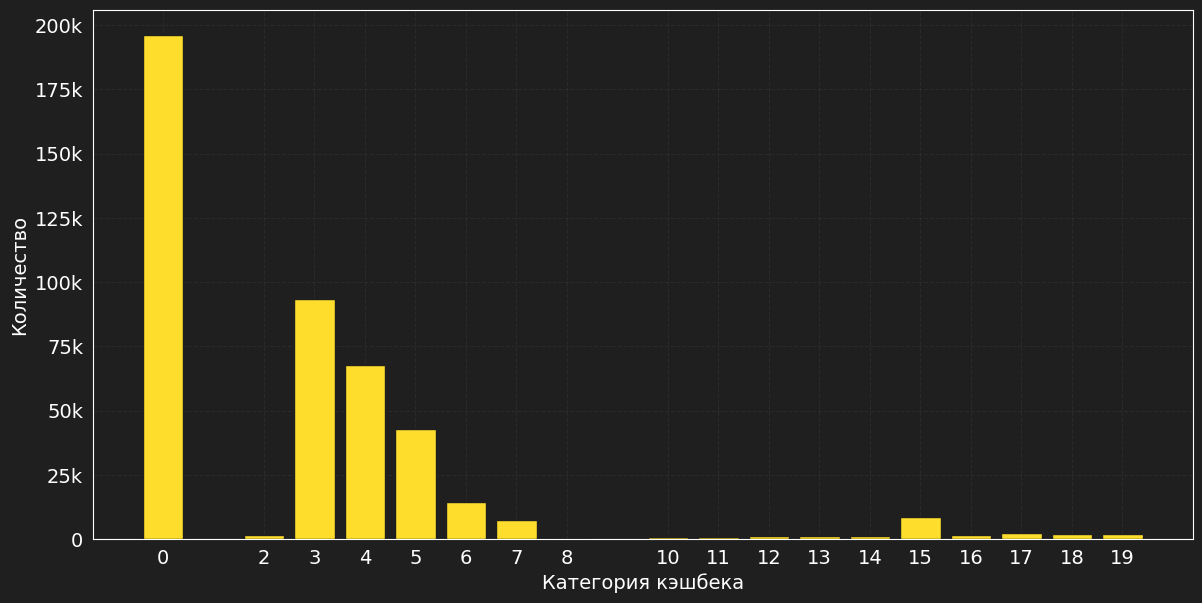

In [6]:
def thousands_formatter(x, pos):
    if x >= 1000:
        return f'{x/1000:.0f}k'
    return f'{x:.0f}'

filtered_df = df[df['cashback_category'] < 20]

counts = filtered_df['cashback_category'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.bar(
    counts.index,
    counts.values,
    color=ACCENT_COLOR,
    edgecolor=BG_COLOR,
    width=0.8,
    zorder=3
)

ax.set_xticks(counts.index)
ax.set_xticklabels(counts.index.astype(int))

formatter = FuncFormatter(thousands_formatter)
ax.yaxis.set_major_formatter(formatter)


ax.grid(axis='y', zorder=0)
plt.tight_layout()
plt.xlabel('Категория кэшбека', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.show()

In [7]:
df_full_len = len(df)
df = df[df['gmv']< 25000]
df = df[df['liters']< 2500]
df = df[(df['entries_cnt']>=df['orders_cnt']) | (df['entries_cnt'].isna())]
df = df[((df['age']>=18) & (df['age'] <= 90)) | (df['age'].isna())]
df = df[df['orders_cnt']<=7]
df = df[df['cashback_category']<10]
df_clean_len = len(df)
(df_full_len-df_clean_len)/df_full_len

0.06352146242624941

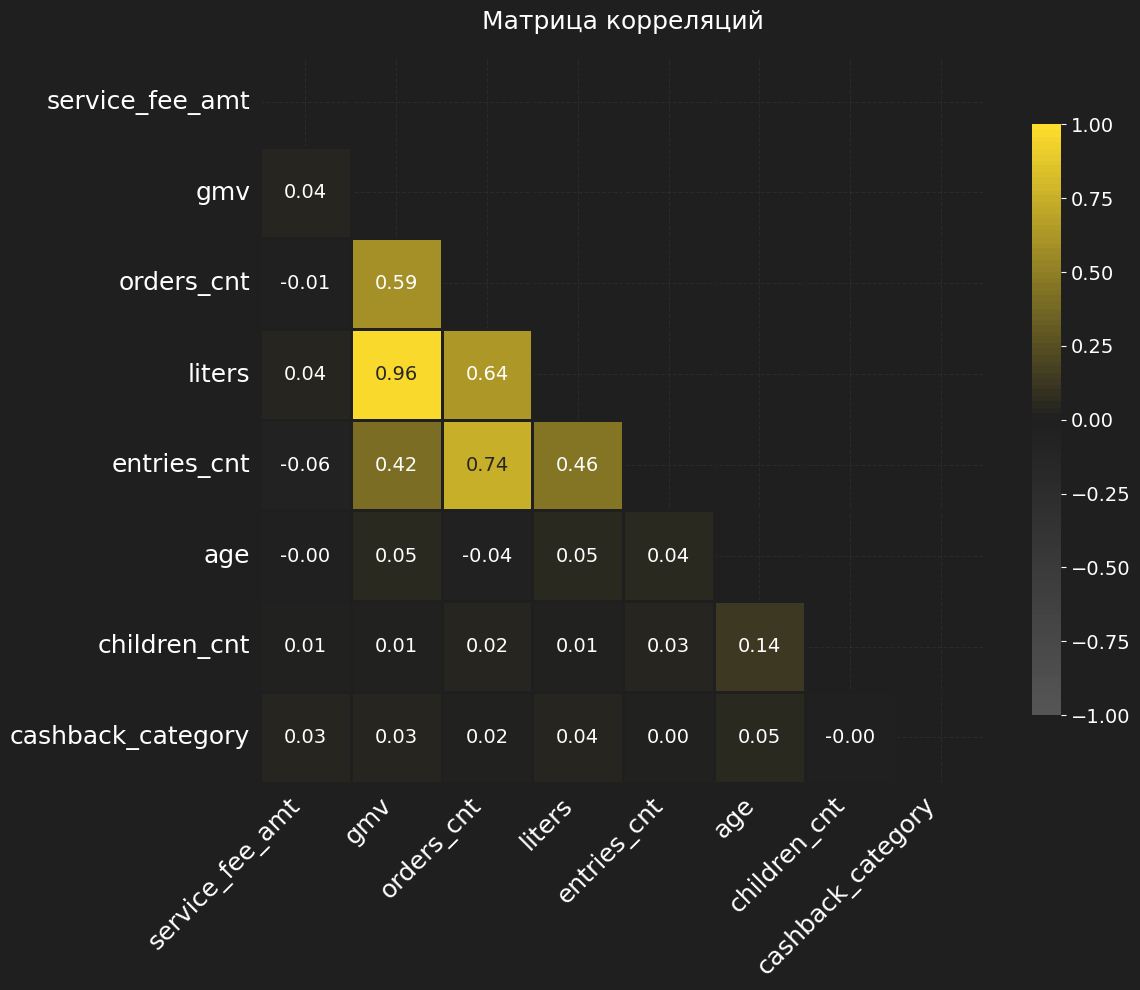

In [8]:
cols_to_analyze = [
    'service_fee_amt',
    'gmv',
    'orders_cnt',
    'liters',
    'entries_cnt',
    'age',
    'children_cnt',
    'cashback_category'
]

corr_matrix = df[cols_to_analyze].corr()

colors = [NEGATIVE_COLOR, BG_COLOR, ACCENT_COLOR]
n_bins = 100
cmap_name = 'dark_yellow_diverging'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

ax = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    vmin=-1, vmax=1,
    center=0,
    square=True,
    linewidths=1,
    linecolor=BG_COLOR,
    cbar_kws={"shrink": .8}
)

plt.title('Матрица корреляций', fontsize=18, color=TEXT_COLOR, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color=TEXT_COLOR)
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color=TEXT_COLOR)

plt.tight_layout()
plt.show()

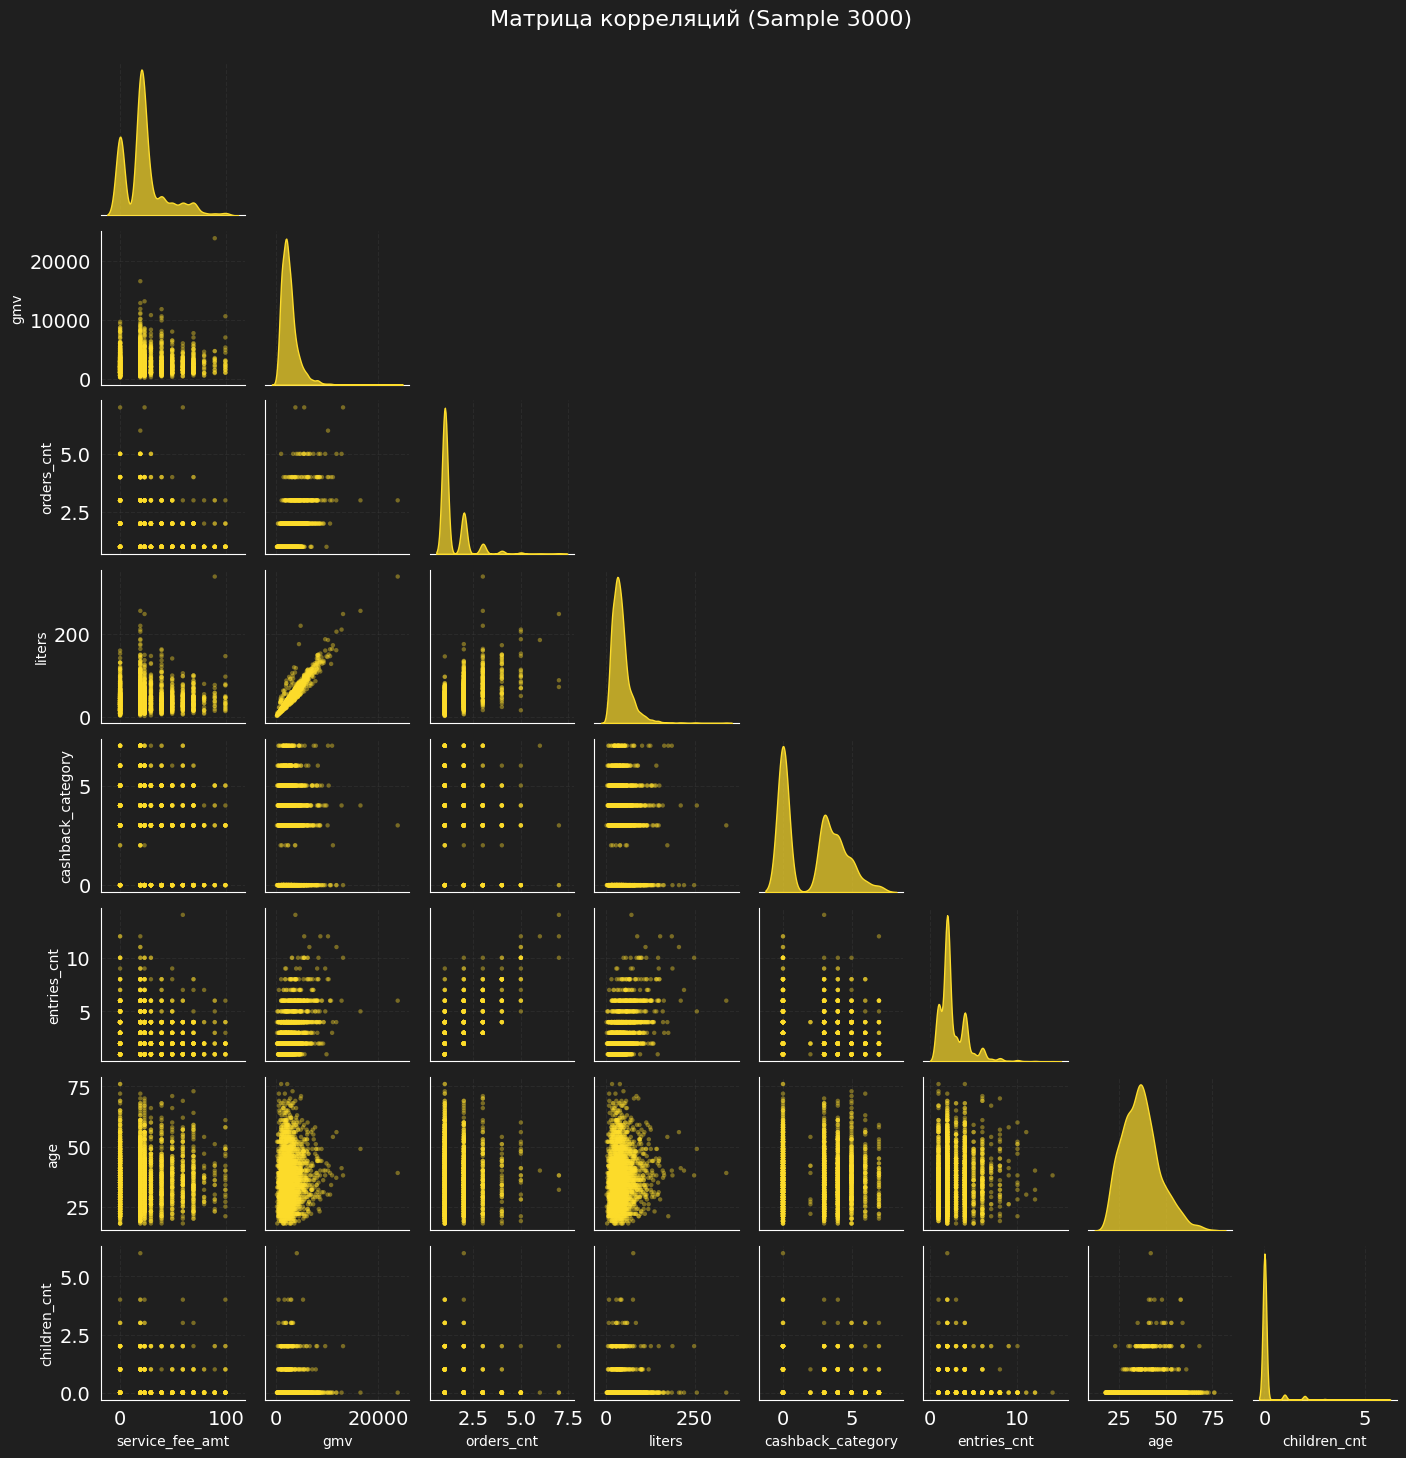

In [9]:
all_numeric_cols = [
    'service_fee_amt',
    'gmv',
    'orders_cnt',
    'liters',
    'cashback_category',
    'entries_cnt',
    'age',
    'children_cnt'
]

df_clean = df[all_numeric_cols].dropna()

sample_size = min(3000, len(df_clean))
df_sample = df_clean.sample(n=sample_size, random_state=42)

g = sns.pairplot(
    df_sample,
    corner=True,
    diag_kind='kde',
    plot_kws={
        'color': ACCENT_COLOR,
        'alpha': 0.4,
        's': 10,
        'edgecolor': 'none'
    },
    diag_kws={
        'color': ACCENT_COLOR,
        'fill': True,
        'alpha': 0.7
    },
    height=1.8
)

g.fig.set_facecolor(BG_COLOR)
g.fig.suptitle(f'Матрица корреляций (Sample {sample_size})', y=1.02, color=TEXT_COLOR, fontsize=16)

for ax in g.axes.flatten():
    if ax:
        ax.set_facecolor(BG_COLOR)
        ax.xaxis.label.set_color(TEXT_COLOR)
        ax.yaxis.label.set_color(TEXT_COLOR)
        ax.tick_params(colors=TEXT_COLOR)

        ax.xaxis.label.set_size(10)
        ax.yaxis.label.set_size(10)

plt.show()

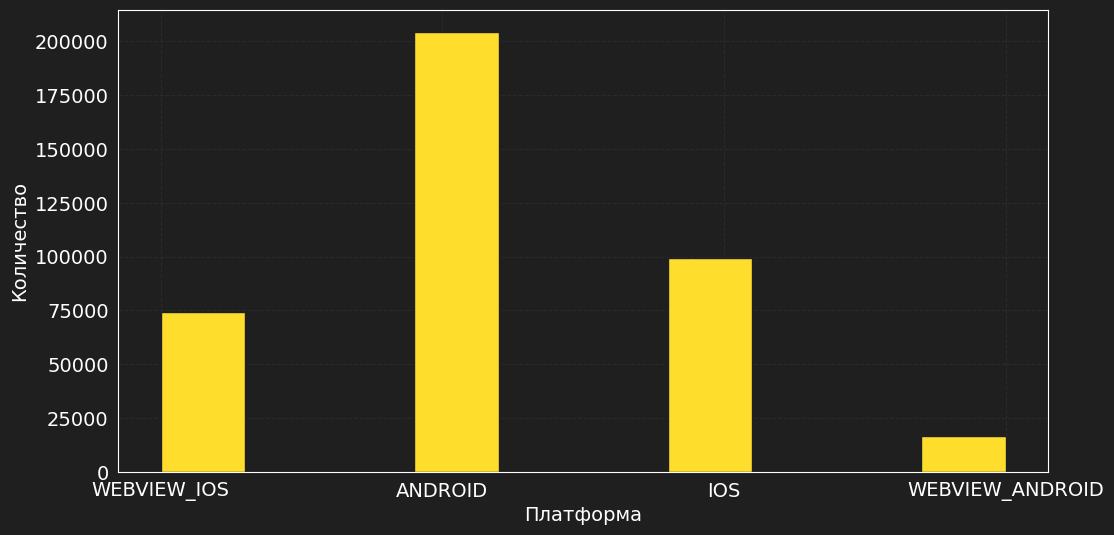

In [10]:
df0 = df[df['platform'] != 'WEB']
cmap_dark_yellow = LinearSegmentedColormap.from_list('DarkYellow', [BG_COLOR, ACCENT_COLOR])

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df0['platform'], color=ACCENT_COLOR, edgecolor=BG_COLOR)
ax.set_ylabel('Количество')
ax.set_xlabel('Платформа')
plt.show()

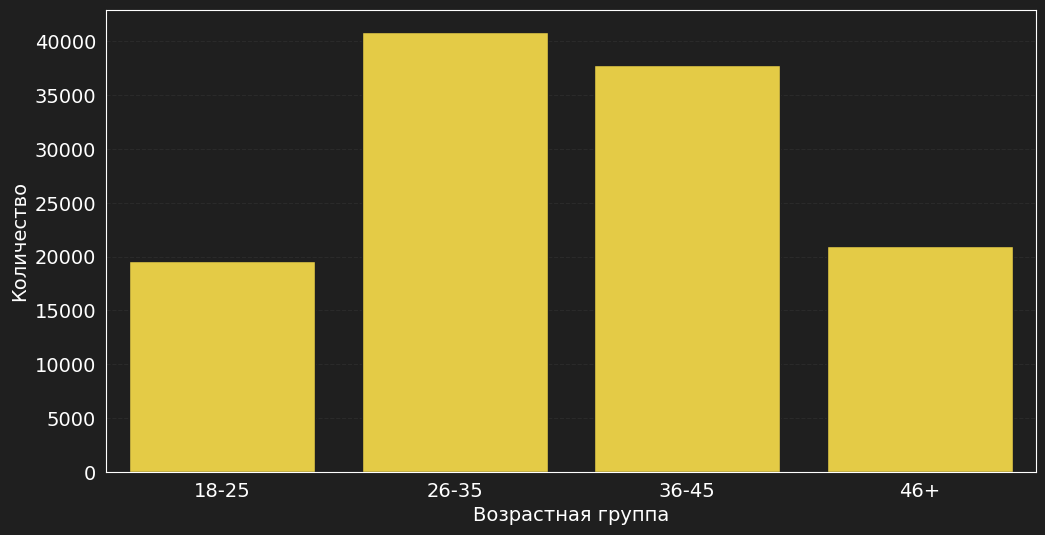

In [11]:
df0 = df[df['platform'] != 'WEB']

cmap_dark_yellow = LinearSegmentedColormap.from_list('DarkYellow', [BG_COLOR, ACCENT_COLOR])
fig, ax = plt.subplots(figsize=(12, 6))
df['age_group'] = pd.cut(df['age'], bins=[18, 26, 36, 46, 100], labels=['18-25', '26-35', '36-45', '46+'])
sns.countplot(x='age_group', data=df, color=ACCENT_COLOR, edgecolor=BG_COLOR, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Возрастная группа')
plt.show()

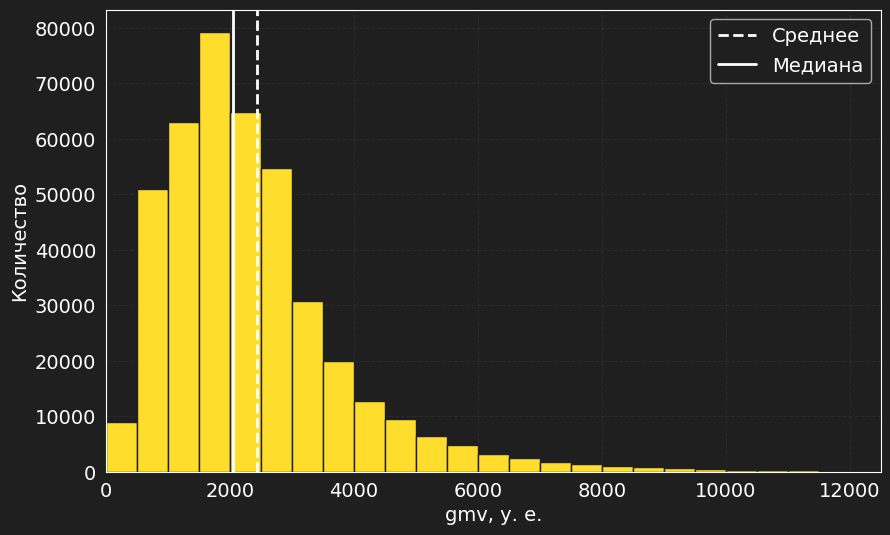

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['gmv'], color=ACCENT_COLOR, edgecolor=BG_COLOR, bins=50)
mean_liters = df['gmv'].mean()
median_liters = df['gmv'].median()

ax.axvline(mean_liters, linestyle='--', linewidth=2, label='Среднее', color='white')
ax.axvline(median_liters, linestyle='-', linewidth=2, label='Медиана', color='white')
ax.legend(loc='upper right')
ax.set_ylabel('Количество')
ax.set_xlim(0, 12500)
ax.set_xlabel('gmv, у. е.')
plt.show()

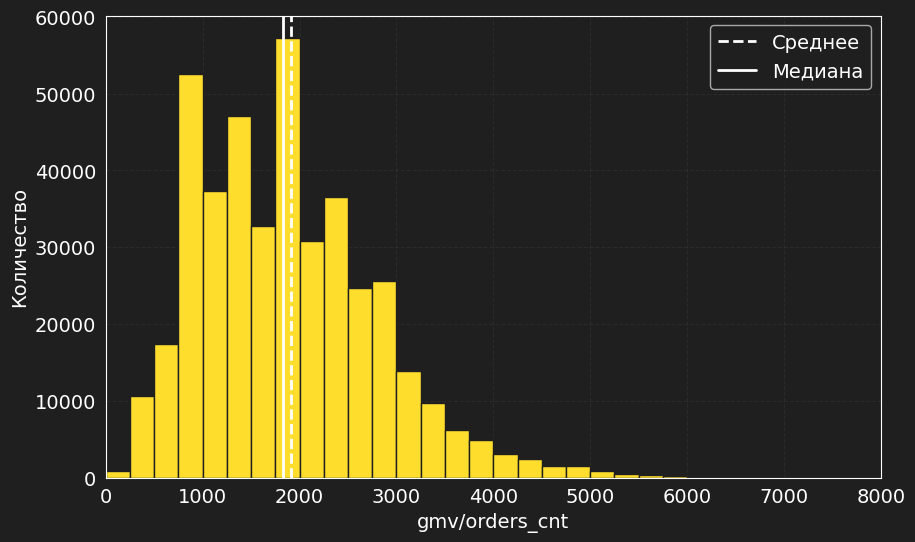

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

df['gmv_per_order'] = df['gmv']/df['orders_cnt']
plt.hist(df['gmv_per_order'], color=ACCENT_COLOR, edgecolor=BG_COLOR, bins=100)
mean_liters = df['gmv_per_order'].mean()
median_liters = df['gmv_per_order'].median()

ax.axvline(mean_liters, linestyle='--', linewidth=2, label='Среднее', color='white')
ax.axvline(median_liters, linestyle='-', linewidth=2, label='Медиана', color='white')
ax.legend(loc='upper right')
ax.set_ylabel('Количество')
ax.set_xlim(0, 8000)
ax.set_xlabel('gmv/orders_cnt')
plt.show()

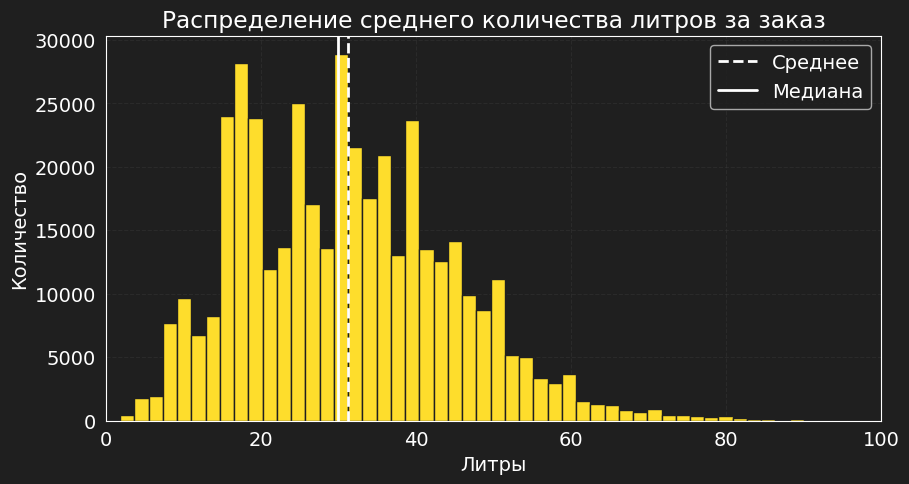

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

df['liters_per_order'] = df['liters'] / df['orders_cnt']
ax.hist(df['liters_per_order'], color=ACCENT_COLOR, edgecolor=BG_COLOR, bins=200)

mean_liters = df['liters_per_order'].mean()
median_liters = df['liters_per_order'].median()

ax.axvline(mean_liters, linestyle='--', linewidth=2, label='Среднее', color='white')
ax.axvline(median_liters, linestyle='-', linewidth=2, label='Медиана', color='white')
ax.legend(loc='upper right')
ax.set_ylabel('Количество')
ax.set_xlim(0, 100)
plt.title('Распределение среднего количества литров за заказ')
ax.set_xlabel('Литры')
plt.show()

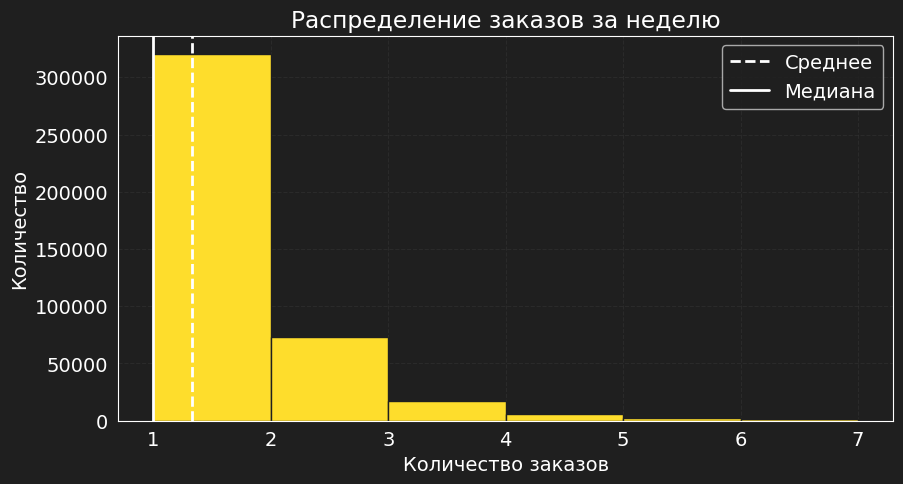

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['orders_cnt'], color=ACCENT_COLOR, edgecolor=BG_COLOR, bins=6)
mean_liters = df['orders_cnt'].mean()
median_liters = df['orders_cnt'].median()

ax.axvline(mean_liters, linestyle='--', linewidth=2, label='Среднее', color='white')
ax.axvline(median_liters, linestyle='-', linewidth=2, label='Медиана', color='white')
ax.legend(loc='upper right')
ax.set_ylabel('Количество')
# ax.set_xlim(0, 6)
plt.title('Распределение заказов за неделю')
ax.set_xlabel('Количество заказов')
plt.show()

In [16]:
df['service_fee_paid'] = df['service_fee_amt']*df['orders_cnt']/7*365/12
df['service_fee_paid'].mean()

np.float64(124.92209039592258)

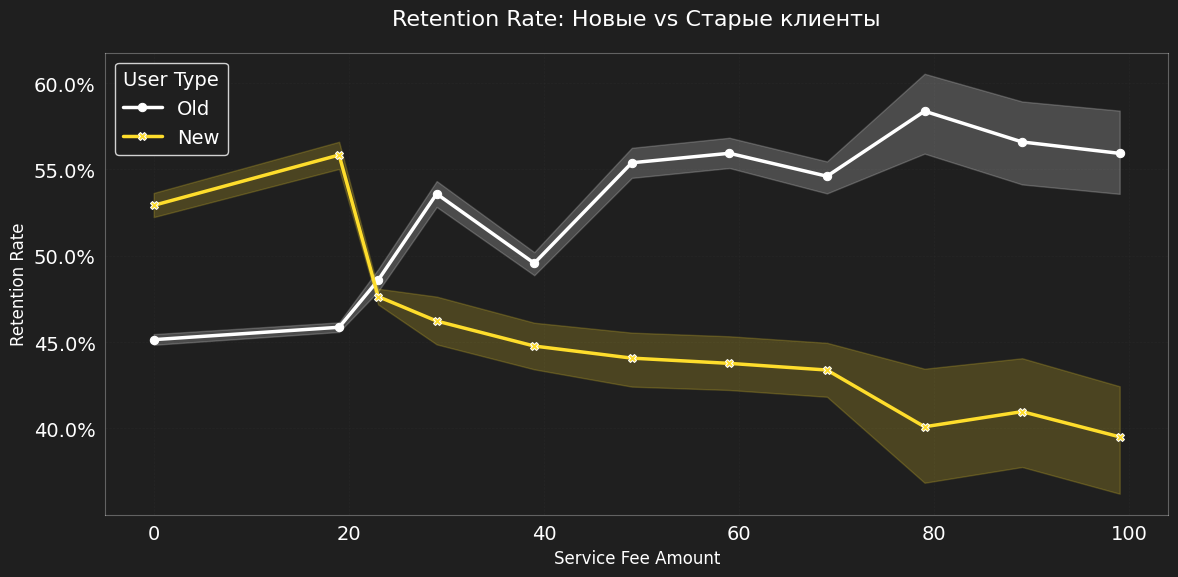

In [17]:
df_next_week = df[['party_rk', 'week']].drop_duplicates()
df_next_week['prev_week'] = df_next_week['week'] - pd.Timedelta(days=7)
retention_data = df.merge(
    df_next_week,
    left_on=['party_rk', 'week'],
    right_on=['party_rk', 'prev_week'],
    how='left',
    indicator=True
)
first_orders = df.groupby('party_rk')['week'].min().reset_index()
first_orders.rename(columns={'week': 'first_week'}, inplace=True)

retention_data = retention_data.merge(first_orders, on='party_rk', how='left')
retention_data['is_retained'] = (retention_data['_merge'] == 'both').astype(int)

if 'week_x' in retention_data.columns:
    retention_data.rename(columns={'week_x': 'week'}, inplace=True)

retention_data['user_type'] = np.where(
    retention_data['week'] == retention_data['first_week'],
    'New',
    'Old'
)

BG_COLOR = '#1f1f1f'
ACCENT_COLOR = '#fedd2c'
TEXT_COLOR = '#ffffff'
GRID_COLOR = '#333333'

custom_palette = {'New': ACCENT_COLOR, 'Old': TEXT_COLOR}

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(BG_COLOR)
ax.set_facecolor(BG_COLOR)

sns.lineplot(
    data=retention_data,
    x='service_fee_amt',
    y='is_retained',
    hue='user_type',
    style='user_type',
    markers=True,
    dashes=False,
    errorbar=('ci', 95),
    palette=custom_palette,
    ax=ax,
    linewidth=2.5
)

ax.set_title('Retention Rate: Новые vs Старые клиенты', fontsize=16, color=TEXT_COLOR, pad=20)
ax.set_xlabel('Service Fee Amount', fontsize=12, color=TEXT_COLOR)
ax.set_ylabel('Retention Rate', fontsize=12, color=TEXT_COLOR)

ax.tick_params(axis='x', colors=TEXT_COLOR)
ax.tick_params(axis='y', colors=TEXT_COLOR)

for spine in ax.spines.values():
    spine.set_color(TEXT_COLOR)
    spine.set_alpha(0.3)

ax.grid(True, color=GRID_COLOR, linestyle='--', linewidth=0.5)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

legend = ax.legend(title='User Type')
frame = legend.get_frame()
frame.set_facecolor(BG_COLOR)
frame.set_edgecolor(TEXT_COLOR)
plt.setp(legend.get_title(), color=TEXT_COLOR)
for text in legend.get_texts():
    plt.setp(text, color=TEXT_COLOR)

plt.tight_layout()
plt.show()